In [1]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# this version creates additional training examples by rotating each original by +/- 10 degrees
# (c) Tariq Rashid, 2016
# license is GPLv2

In [2]:
# numpy provides arrays and useful functions for working with them

# 3개층의 신경망으로 MNIST 데이터를 학습하는 코드

import numpy
# 시그모이드 함수 expit() 사용을 위해 scipy.special 불러오기

import scipy.special
# 행렬을 시각화하기 위한 라이브러리 

import scipy.ndimage
# n차원 이미지 

import matplotlib.pyplot
%matplotlib inline


n.train

In [3]:
# 신경망 클래스 정의
class neuralNetwork:
    
    
    # 신경망 초기화하기
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # 신경망에 질의하기
    def query(self, inputs_list):
        # 입력 리스트를 2차원 행렬로 변환
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [4]:
# 입력, 은닉, 출력 노드의 수 
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# 학습률
learning_rate = 0.01

# 신경망의 인스턴스 생성
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [5]:
# MNIST 학습 데이터 csv 파일로 가져오기 
training_data_file = open("C:/Users/kbsna/바탕 화면/Recognize MINIST handwriting data/Deeplearning/Neural_network/mnist_test20.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [6]:
# 신경망 학습시키기 

# epochs 주기, 학습 데이터가 학습을 위해 사용되는 횟수 
epochs = 10

for e in range(epochs):
    # 학습 데이터 모음 내의 모든 레코드(행) 검색
    for record in training_data_list:
        # 레코드를 , 로 분리하기 
        all_values = record.split(',')
        # 입력값의 범위와 값 조정하기
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # training결과값 생성 ( 모두 0.01, 실제 값인 0.99제외 )
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0]은 이 레코드에 대한 결과 값이다 
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        
        ##  rotated variations 만들기 
        # rotated anticlockwise by x degrees
        inputs_plusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), 10, cval=0.01, order=1, reshape=False)
        n.train(inputs_plusx_img.reshape(784), targets)
        # rotated clockwise by x degrees
        inputs_minusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -10, cval=0.01, order=1, reshape=False)
        n.train(inputs_minusx_img.reshape(784), targets)
        
        # rotated anticlockwise by 10 degrees
        #inputs_plus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), 10, cval=0.01, order=1, reshape=False)
        #n.train(inputs_plus10_img.reshape(784), targets)
        # rotated clockwise by 10 degrees
        #inputs_minus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -10, cval=0.01, order=1, reshape=False)
        #n.train(inputs_minus10_img.reshape(784), targets)
        
        pass
    pass

In [7]:

# mnist 테스트 데이터 csv 파일을 리스트로 불러오기 
test_data_file = open("C:/Users/kbsna/바탕 화면/Recognize MINIST handwriting data/Deeplearning/Neural_network/mnist_test20.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [8]:
# 신경망 테스트하기 

# 신경망의 성능의 지표가 되는 성적표를 초기화하기
scorecard = []

# 데이터 모음 내 모든 레코드 탐색
for record in test_data_list:
    # , 를 사용해서 레코드 분리
    all_values = record.split(',')
    # 정답은 첫번째 값
    correct_label = int(all_values[0])
    # 입력 값의 범위와 값 조정
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
 
    # 신경망에 질의
    outputs = n.query(inputs)
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    label = numpy.argmax(outputs)
 
    # 정답 또는 오답을 리스트에 추가하기
    if (label == correct_label):
        # 네트워크의 답이 정답과 일치할 경우 성적표에 1을 더한다 
        scorecard.append(1)
    else:
        # 네트워크의 답이 정답과 일치하지 않을 경우 성적표에 0을 더한다 
        scorecard.append(0)
        pass
    
    pass

In [9]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.55


  .

In [10]:
print(scorecard_array)

[1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1]


In [11]:
print(scorecard)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1]


In [12]:
print(test_data_list[0])

7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,66,14,67,67,67,59,21,236,254,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,253,209,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,233,255,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,254,238,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,249,254,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,254,187,5,0,0

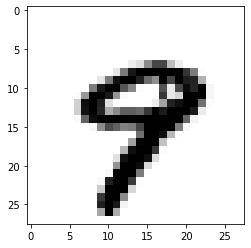

In [13]:
for i in range(10):
    imageA = test_data_list[i].split(',')
    image_array = numpy.asfarray(imageA[1:]).reshape((28,28))
    matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
    
    # 다 보고 싶은거 
    
    # image array _ 1개1개 저장하도록 ()

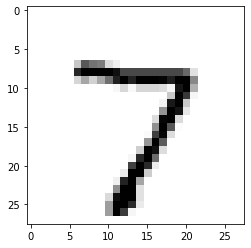

In [14]:
imageA = test_data_list[0].split(',')
image_array = numpy.asfarray(imageA[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')